In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from sklearn import linear_model
import statsmodels.api as sm


warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [2]:
house_df = pd.read_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/regresyon/house-prices-advanced-regression-techniques/train.csv")

In [3]:
house_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_int_64_df = house_df.select_dtypes(include = ["int64"]).copy()

house_float64_df = house_df.select_dtypes(include = ["float64"]).copy()

house_object_df = house_df.select_dtypes(include = ["object"]).copy()

In [5]:
house_int_64_df.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# KAYIP DEĞERLER

## Sürekli Değişkenlerdeki Nan Değerlerden Kurtulmak

In [6]:
numaric = pd.concat([house_float64_df,house_int_64_df],axis = 1)

In [7]:
numaric.isnull().sum()*100/len(numaric)

LotFrontage     17.740
MasVnrArea       0.548
GarageYrBlt      5.548
Id               0.000
MSSubClass       0.000
LotArea          0.000
OverallQual      0.000
OverallCond      0.000
YearBuilt        0.000
YearRemodAdd     0.000
BsmtFinSF1       0.000
BsmtFinSF2       0.000
BsmtUnfSF        0.000
TotalBsmtSF      0.000
1stFlrSF         0.000
2ndFlrSF         0.000
LowQualFinSF     0.000
GrLivArea        0.000
BsmtFullBath     0.000
BsmtHalfBath     0.000
FullBath         0.000
HalfBath         0.000
BedroomAbvGr     0.000
KitchenAbvGr     0.000
TotRmsAbvGrd     0.000
Fireplaces       0.000
GarageCars       0.000
GarageArea       0.000
WoodDeckSF       0.000
OpenPorchSF      0.000
EnclosedPorch    0.000
3SsnPorch        0.000
ScreenPorch      0.000
PoolArea         0.000
MiscVal          0.000
MoSold           0.000
YrSold           0.000
SalePrice        0.000
dtype: float64

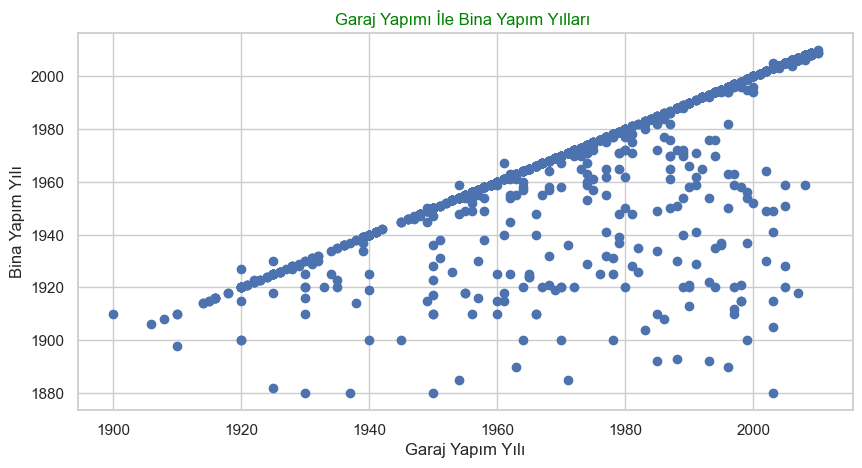

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(numaric.GarageYrBlt,numaric.YearBuilt)
plt.title("Garaj Yapımı İle Bina Yapım Yılları ", color="green")
plt.xlabel("Garaj Yapım Yılı")
plt.ylabel("Bina Yapım Yılı")
plt.show()

In [9]:
# Garaj Yapım yılı ile Bina Yapım Yılları arasında doğrusal bir orantı (Büyük çoğunluğu aynı yıl içerisinde yapılmış) olduğu için GarageYrBlt içerisindeki NaN değerlerini
# YearBuilt a eşitleyeceğiz.


In [10]:
numaric["GarageYrBlt"].fillna(numaric["YearBuilt"], inplace = True)

In [11]:
numaric.isnull().sum()*100/len(numaric)
               

LotFrontage     17.740
MasVnrArea       0.548
GarageYrBlt      0.000
Id               0.000
MSSubClass       0.000
LotArea          0.000
OverallQual      0.000
OverallCond      0.000
YearBuilt        0.000
YearRemodAdd     0.000
BsmtFinSF1       0.000
BsmtFinSF2       0.000
BsmtUnfSF        0.000
TotalBsmtSF      0.000
1stFlrSF         0.000
2ndFlrSF         0.000
LowQualFinSF     0.000
GrLivArea        0.000
BsmtFullBath     0.000
BsmtHalfBath     0.000
FullBath         0.000
HalfBath         0.000
BedroomAbvGr     0.000
KitchenAbvGr     0.000
TotRmsAbvGrd     0.000
Fireplaces       0.000
GarageCars       0.000
GarageArea       0.000
WoodDeckSF       0.000
OpenPorchSF      0.000
EnclosedPorch    0.000
3SsnPorch        0.000
ScreenPorch      0.000
PoolArea         0.000
MiscVal          0.000
MoSold           0.000
YrSold           0.000
SalePrice        0.000
dtype: float64

In [12]:
object_copy=house_object_df.copy()

Aynı mahalledeki apartlmanaların belediye planlarına göre caddeye yaklaşımları benzer olacağı düşüncesinden
LotFrontage deki NaN değerlerini Neighborhood içndeki verilerin ortalamasına göre belirleyeceğiz

In [13]:
streets = object_copy["Neighborhood"].unique()
streets

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [14]:
copy_house1 = house_df.copy()

In [15]:
a = copy_house1.groupby("Neighborhood")["LotFrontage"].mean()
       

In [16]:
for i in range(len(copy_house1)):
    for v in range(len(a)) :
        if copy_house1["Neighborhood"][i] == a.index[v] or copy_house1["LotFrontage"][i]=="nan":
            copy_house1["LotFrontage"][i] = a.values[v]
            
        
            

In [17]:
numaric["LotFrontage"] = copy_house1["LotFrontage"]

In [18]:
numaric.isnull().sum()*100/len(numaric)

LotFrontage     0.000
MasVnrArea      0.548
GarageYrBlt     0.000
Id              0.000
MSSubClass      0.000
LotArea         0.000
OverallQual     0.000
OverallCond     0.000
YearBuilt       0.000
YearRemodAdd    0.000
BsmtFinSF1      0.000
BsmtFinSF2      0.000
BsmtUnfSF       0.000
TotalBsmtSF     0.000
1stFlrSF        0.000
2ndFlrSF        0.000
LowQualFinSF    0.000
GrLivArea       0.000
BsmtFullBath    0.000
BsmtHalfBath    0.000
FullBath        0.000
HalfBath        0.000
BedroomAbvGr    0.000
KitchenAbvGr    0.000
TotRmsAbvGrd    0.000
Fireplaces      0.000
GarageCars      0.000
GarageArea      0.000
WoodDeckSF      0.000
OpenPorchSF     0.000
EnclosedPorch   0.000
3SsnPorch       0.000
ScreenPorch     0.000
PoolArea        0.000
MiscVal         0.000
MoSold          0.000
YrSold          0.000
SalePrice       0.000
dtype: float64

Evlerdeki Duvar ölçüleri aynı tip evlerde benzer dağılacağı için MasVnrArea daki NaN değerleri
BldgType deki verilerin ortalamasına göre belirleyeceğiz.

In [19]:
list_MSSubClass = copy_house1.LotShape.unique()
list_MSSubClass

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [20]:
b = copy_house1.groupby("BldgType")["MasVnrArea"].mean()
b

BldgType
1Fam     101.948
2fmCon    15.161
Duplex   111.000
Twnhs    156.279
TwnhsE   123.239
Name: MasVnrArea, dtype: float64

In [21]:
for i in range(len(copy_house1)):
    for v in range(len(b)) :
        if copy_house1["BldgType"][i] == b.index[v] or copy_house1["MasVnrArea"][i]=="nan":
            copy_house1["MasVnrArea"][i] = b.values[v]

In [22]:
numaric["MasVnrArea"] = copy_house1["MasVnrArea"]

In [23]:
numaric.isnull().sum()*100/len(numaric)

LotFrontage     0.000
MasVnrArea      0.000
GarageYrBlt     0.000
Id              0.000
MSSubClass      0.000
LotArea         0.000
OverallQual     0.000
OverallCond     0.000
YearBuilt       0.000
YearRemodAdd    0.000
BsmtFinSF1      0.000
BsmtFinSF2      0.000
BsmtUnfSF       0.000
TotalBsmtSF     0.000
1stFlrSF        0.000
2ndFlrSF        0.000
LowQualFinSF    0.000
GrLivArea       0.000
BsmtFullBath    0.000
BsmtHalfBath    0.000
FullBath        0.000
HalfBath        0.000
BedroomAbvGr    0.000
KitchenAbvGr    0.000
TotRmsAbvGrd    0.000
Fireplaces      0.000
GarageCars      0.000
GarageArea      0.000
WoodDeckSF      0.000
OpenPorchSF     0.000
EnclosedPorch   0.000
3SsnPorch       0.000
ScreenPorch     0.000
PoolArea        0.000
MiscVal         0.000
MoSold          0.000
YrSold          0.000
SalePrice       0.000
dtype: float64

In [24]:
liste2 = numaric.columns

for x in liste2:
    print("{} sütün içindeki problemli değerler : ".format(x)) # Hatalı ifadenin sütünunu yazıyoruz
    print("------")
    for i in numaric[x] :
        try :
            float(i) # Tüm değerleri float a çevir çeviremediğin veriyi yaz
        except:
            print(i)

LotFrontage sütün içindeki problemli değerler : 
------
MasVnrArea sütün içindeki problemli değerler : 
------
GarageYrBlt sütün içindeki problemli değerler : 
------
Id sütün içindeki problemli değerler : 
------
MSSubClass sütün içindeki problemli değerler : 
------
LotArea sütün içindeki problemli değerler : 
------
OverallQual sütün içindeki problemli değerler : 
------
OverallCond sütün içindeki problemli değerler : 
------
YearBuilt sütün içindeki problemli değerler : 
------
YearRemodAdd sütün içindeki problemli değerler : 
------
BsmtFinSF1 sütün içindeki problemli değerler : 
------
BsmtFinSF2 sütün içindeki problemli değerler : 
------
BsmtUnfSF sütün içindeki problemli değerler : 
------
TotalBsmtSF sütün içindeki problemli değerler : 
------
1stFlrSF sütün içindeki problemli değerler : 
------
2ndFlrSF sütün içindeki problemli değerler : 
------
LowQualFinSF sütün içindeki problemli değerler : 
------
GrLivArea sütün içindeki problemli değerler : 
------
BsmtFullBath sütün 

## Katagorik Değşkenler İçerisinde NaN Değerlerden Kurtulmak.

In [25]:
house_object_df.isnull().sum()*100/len(house_object_df)

MSZoning         0.000
Street           0.000
Alley           93.767
LotShape         0.000
LandContour      0.000
Utilities        0.000
LotConfig        0.000
LandSlope        0.000
Neighborhood     0.000
Condition1       0.000
Condition2       0.000
BldgType         0.000
HouseStyle       0.000
RoofStyle        0.000
RoofMatl         0.000
Exterior1st      0.000
Exterior2nd      0.000
MasVnrType       0.548
ExterQual        0.000
ExterCond        0.000
Foundation       0.000
BsmtQual         2.534
BsmtCond         2.534
BsmtExposure     2.603
BsmtFinType1     2.534
BsmtFinType2     2.603
Heating          0.000
HeatingQC        0.000
CentralAir       0.000
Electrical       0.068
KitchenQual      0.000
Functional       0.000
FireplaceQu     47.260
GarageType       5.548
GarageFinish     5.548
GarageQual       5.548
GarageCond       5.548
PavedDrive       0.000
PoolQC          99.521
Fence           80.753
MiscFeature     96.301
SaleType         0.000
SaleCondition    0.000
dtype: floa

Datasetimizin sütunlarında yüksek oranda NaN değerlere sahip olan verileri siliyoruz.


In [26]:
copy_house1.drop(['MiscFeature', 'Fence','PoolQC','Alley','FireplaceQu'], axis=1,inplace = True)

In [27]:
copy_house_object_df = copy_house1.select_dtypes(include = ["object"]).copy()

In [28]:
copy_house_object_df.isnull().sum()*100/len(copy_house_object_df)

MSZoning        0.000
Street          0.000
LotShape        0.000
LandContour     0.000
Utilities       0.000
LotConfig       0.000
LandSlope       0.000
Neighborhood    0.000
Condition1      0.000
Condition2      0.000
BldgType        0.000
HouseStyle      0.000
RoofStyle       0.000
RoofMatl        0.000
Exterior1st     0.000
Exterior2nd     0.000
MasVnrType      0.548
ExterQual       0.000
ExterCond       0.000
Foundation      0.000
BsmtQual        2.534
BsmtCond        2.534
BsmtExposure    2.603
BsmtFinType1    2.534
BsmtFinType2    2.603
Heating         0.000
HeatingQC       0.000
CentralAir      0.000
Electrical      0.068
KitchenQual     0.000
Functional      0.000
GarageType      5.548
GarageFinish    5.548
GarageQual      5.548
GarageCond      5.548
PavedDrive      0.000
SaleType        0.000
SaleCondition   0.000
dtype: float64

In [29]:
# Geriye kalanları bir önceki veriye göre doldurma yöntemi ile dolduralım

liste = ["MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish","GarageQual","GarageCond"]


In [30]:
GarageCond_liste = copy_house1.GarageCond
for v in liste :   
    for i in range(len(GarageCond_liste)) :
        if pd.isnull(GarageCond_liste[i]):
            GarageCond_liste[i] = GarageCond_liste[i-1]
            
copy_house1.GarageCond.unique()        

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [31]:

for v in liste :
    _liste = copy_house1[v]
    for i in range(len(copy_house1)) :
        if pd.isnull(_liste[i]):
            _liste[i] = _liste[i-1]

In [32]:
copy_house1.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [33]:
copy_house_object_df = copy_house1.select_dtypes(include = ["object"]).copy()

In [34]:
copy_house_object_df.isnull().sum()*100/len(copy_house_object_df)

MSZoning        0.000
Street          0.000
LotShape        0.000
LandContour     0.000
Utilities       0.000
LotConfig       0.000
LandSlope       0.000
Neighborhood    0.000
Condition1      0.000
Condition2      0.000
BldgType        0.000
HouseStyle      0.000
RoofStyle       0.000
RoofMatl        0.000
Exterior1st     0.000
Exterior2nd     0.000
MasVnrType      0.000
ExterQual       0.000
ExterCond       0.000
Foundation      0.000
BsmtQual        0.000
BsmtCond        0.000
BsmtExposure    0.000
BsmtFinType1    0.000
BsmtFinType2    0.000
Heating         0.000
HeatingQC       0.000
CentralAir      0.000
Electrical      0.068
KitchenQual     0.000
Functional      0.000
GarageType      0.000
GarageFinish    0.000
GarageQual      0.000
GarageCond      0.000
PavedDrive      0.000
SaleType        0.000
SaleCondition   0.000
dtype: float64

# AYKIRI DEĞERLER

In [35]:
copy_house_int_64_df = copy_house1.select_dtypes(include = ["int64"]).copy()

copy_float64_df = copy_house1.select_dtypes(include = ["float64"]).copy()

copy_numaric = pd.concat([copy_house_int_64_df,copy_float64_df],axis = 1)

liste_aykırı = copy_numaric.columns
liste_aykırı = list(liste_aykırı)
len(liste_aykırı)

38

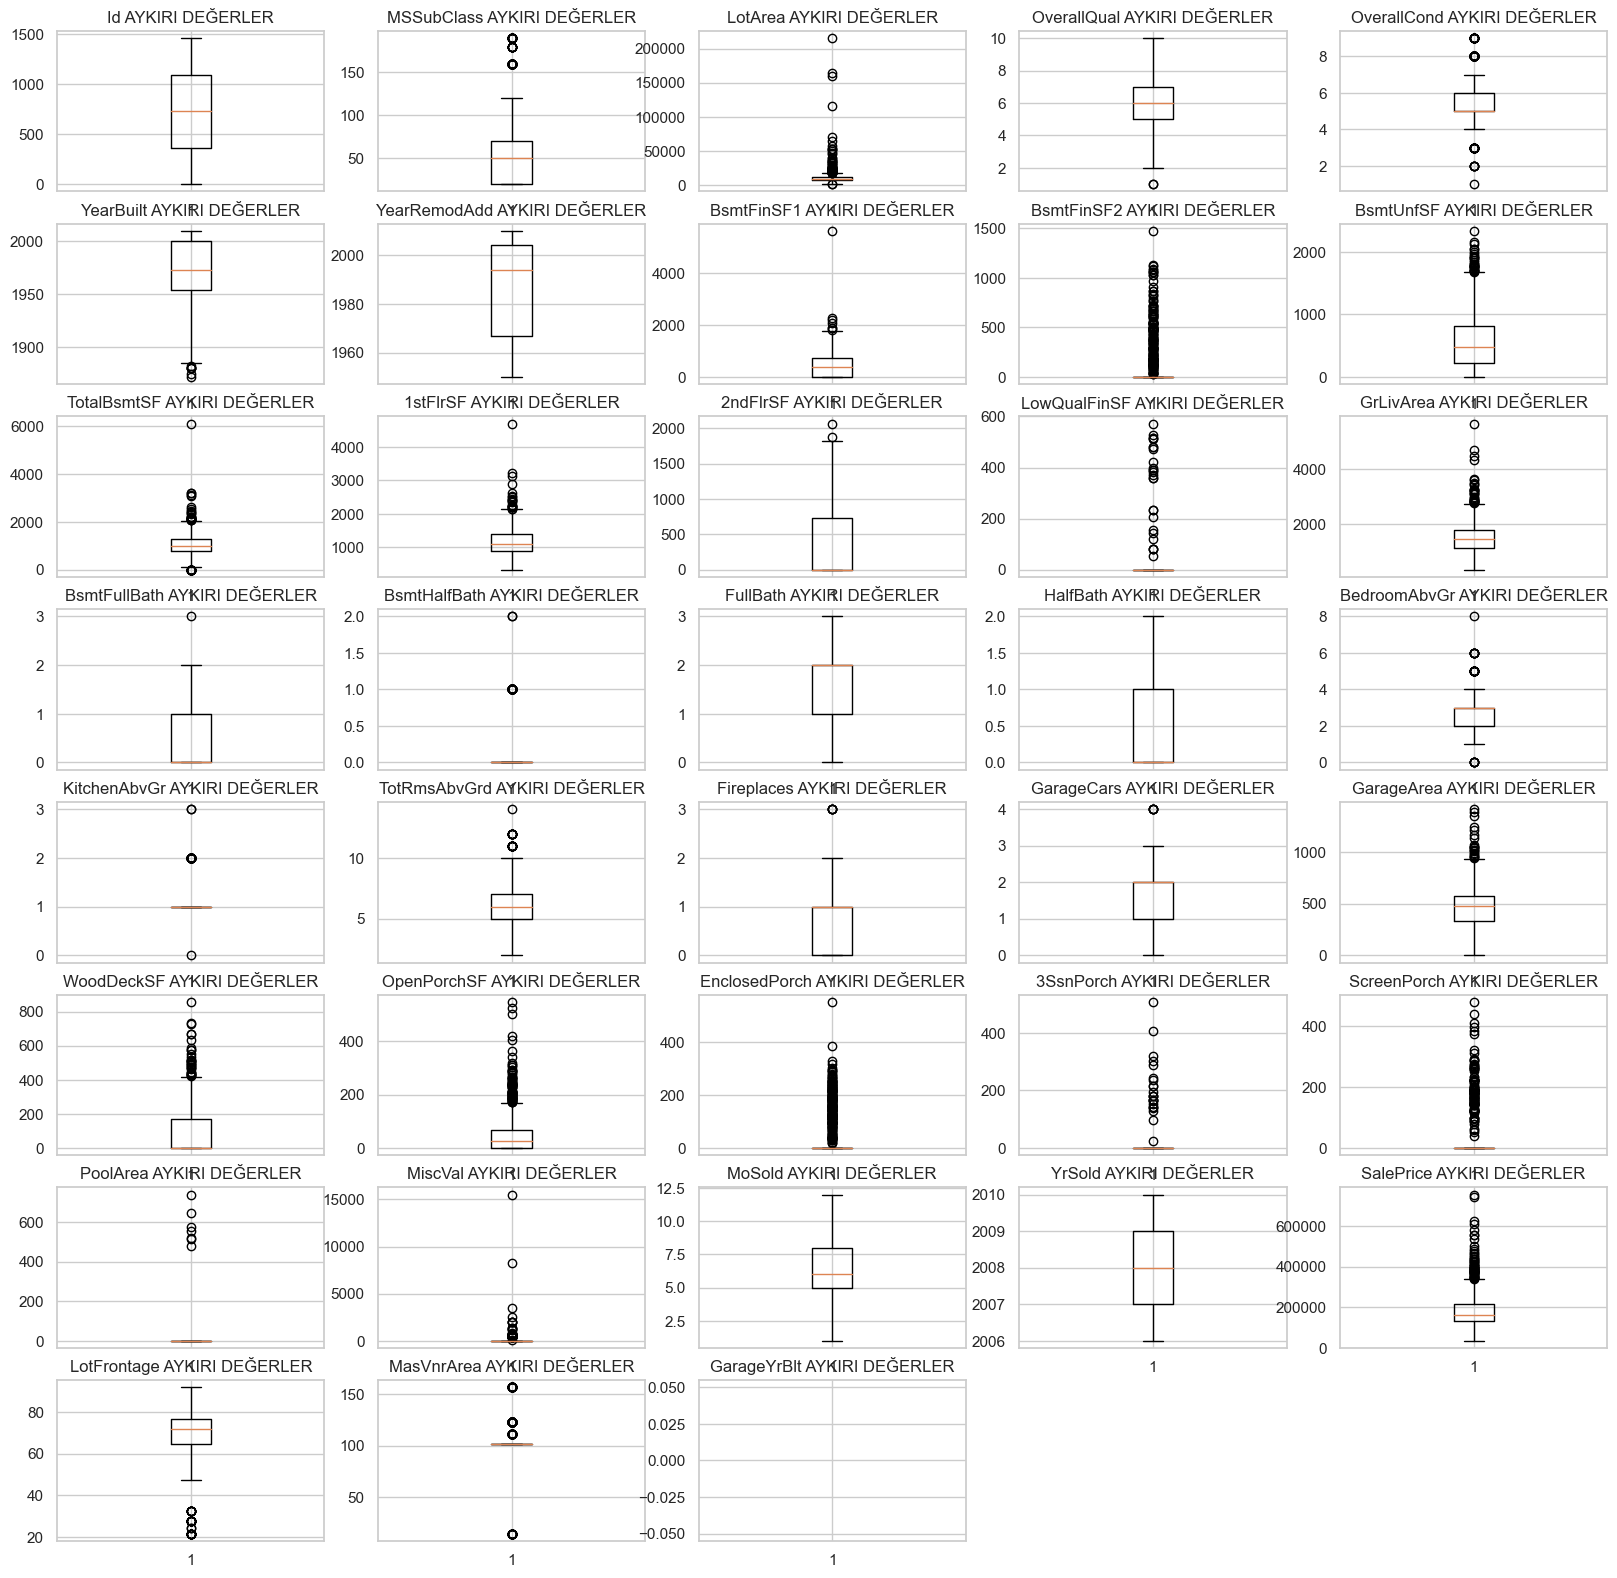

In [36]:
liste_g = copy_numaric.columns
liste_g = list(liste_g)
plt.figure(figsize = (20,20))

for i in range(38):
    plt.subplot(8,5,i+1)
    plt.boxplot(copy_numaric[liste_g[i]])
    plt.title ("{} AYKIRI DEĞERLER".format(liste_g[i]))

In [37]:
winsorize_list =["w_"+liste_g[i] for i in range(len(liste_g))] 
from scipy.stats.mstats import winsorize

for i in range(len(winsorize_list)):
    copy_numaric[ winsorize_list[i]] = winsorize(copy_numaric[liste_g[i]],(0.05,0.14))

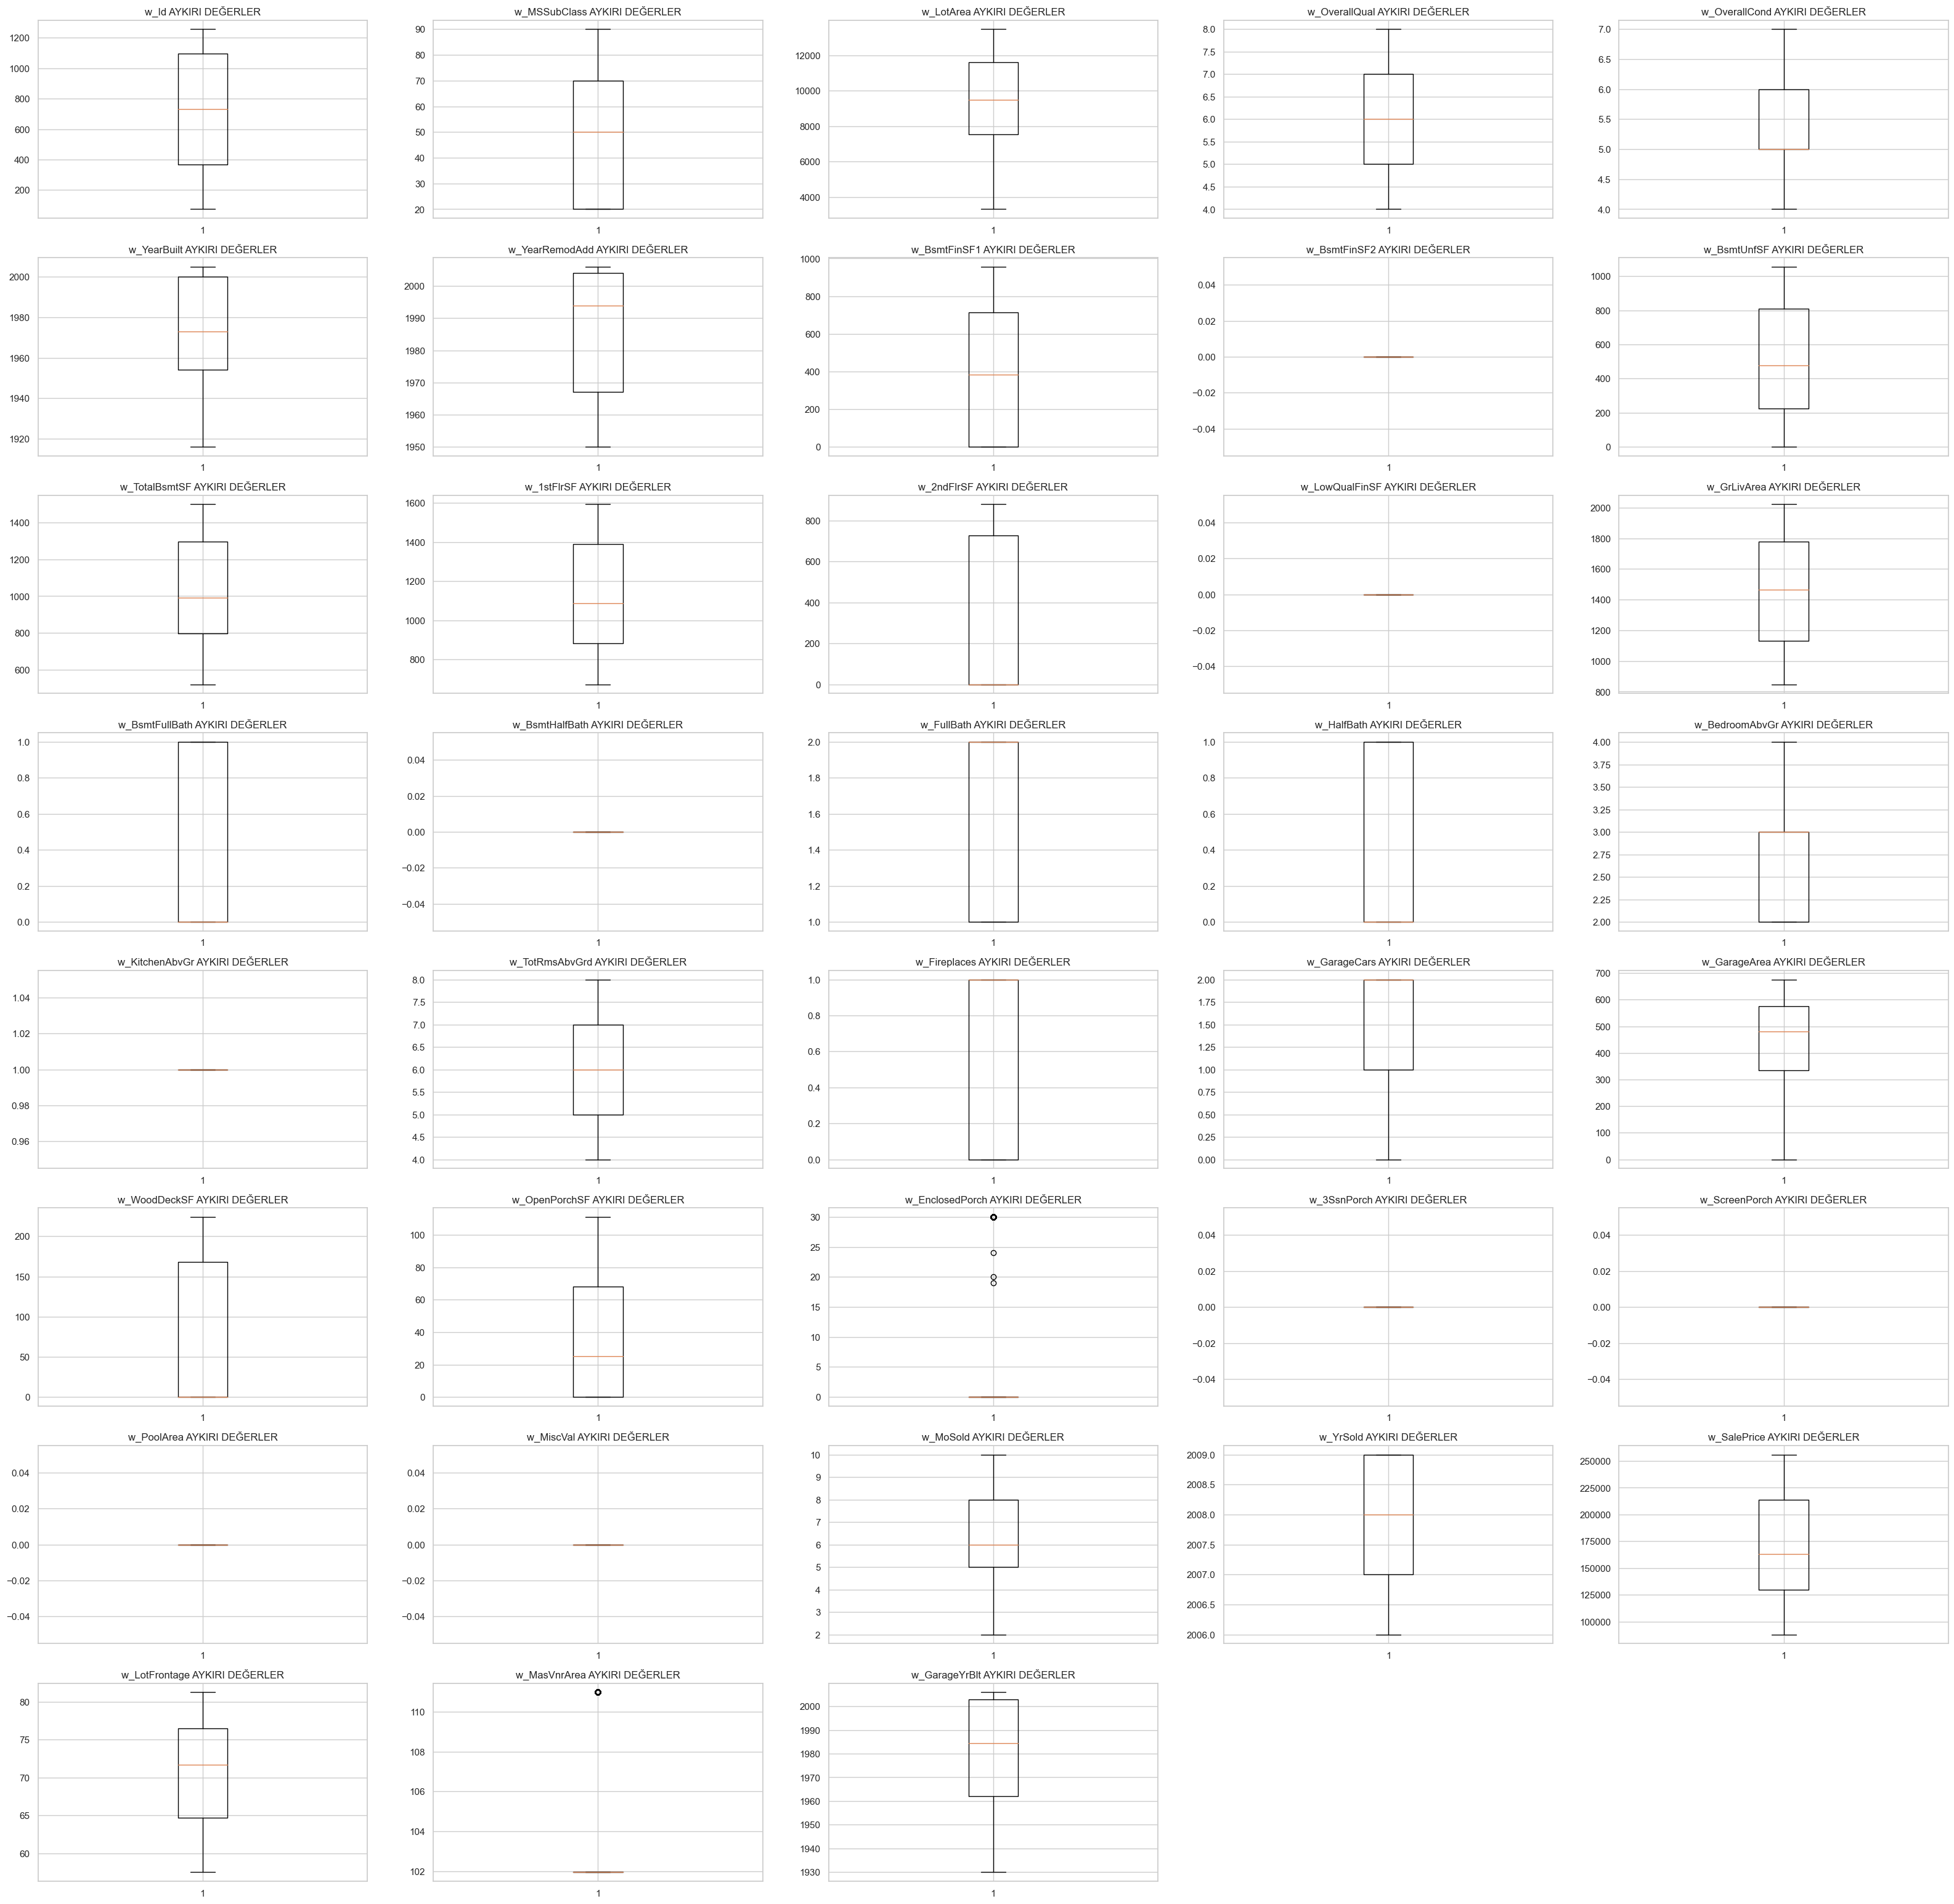

In [38]:
plt.figure(figsize=(40,40))
for i in range(38):
    plt.subplot(8,5,i+1)
    plt.boxplot(copy_numaric[winsorize_list[i]])
    plt.title ("{} AYKIRI DEĞERLER".format(winsorize_list[i]))

In [39]:
logartima_list =["log_"+liste_g[i] for i in range(len(liste_g))] 
for i in range(len(logartima_list)):
    copy_numaric[ logartima_list[i]] = np.log(copy_numaric[liste_g[i]])

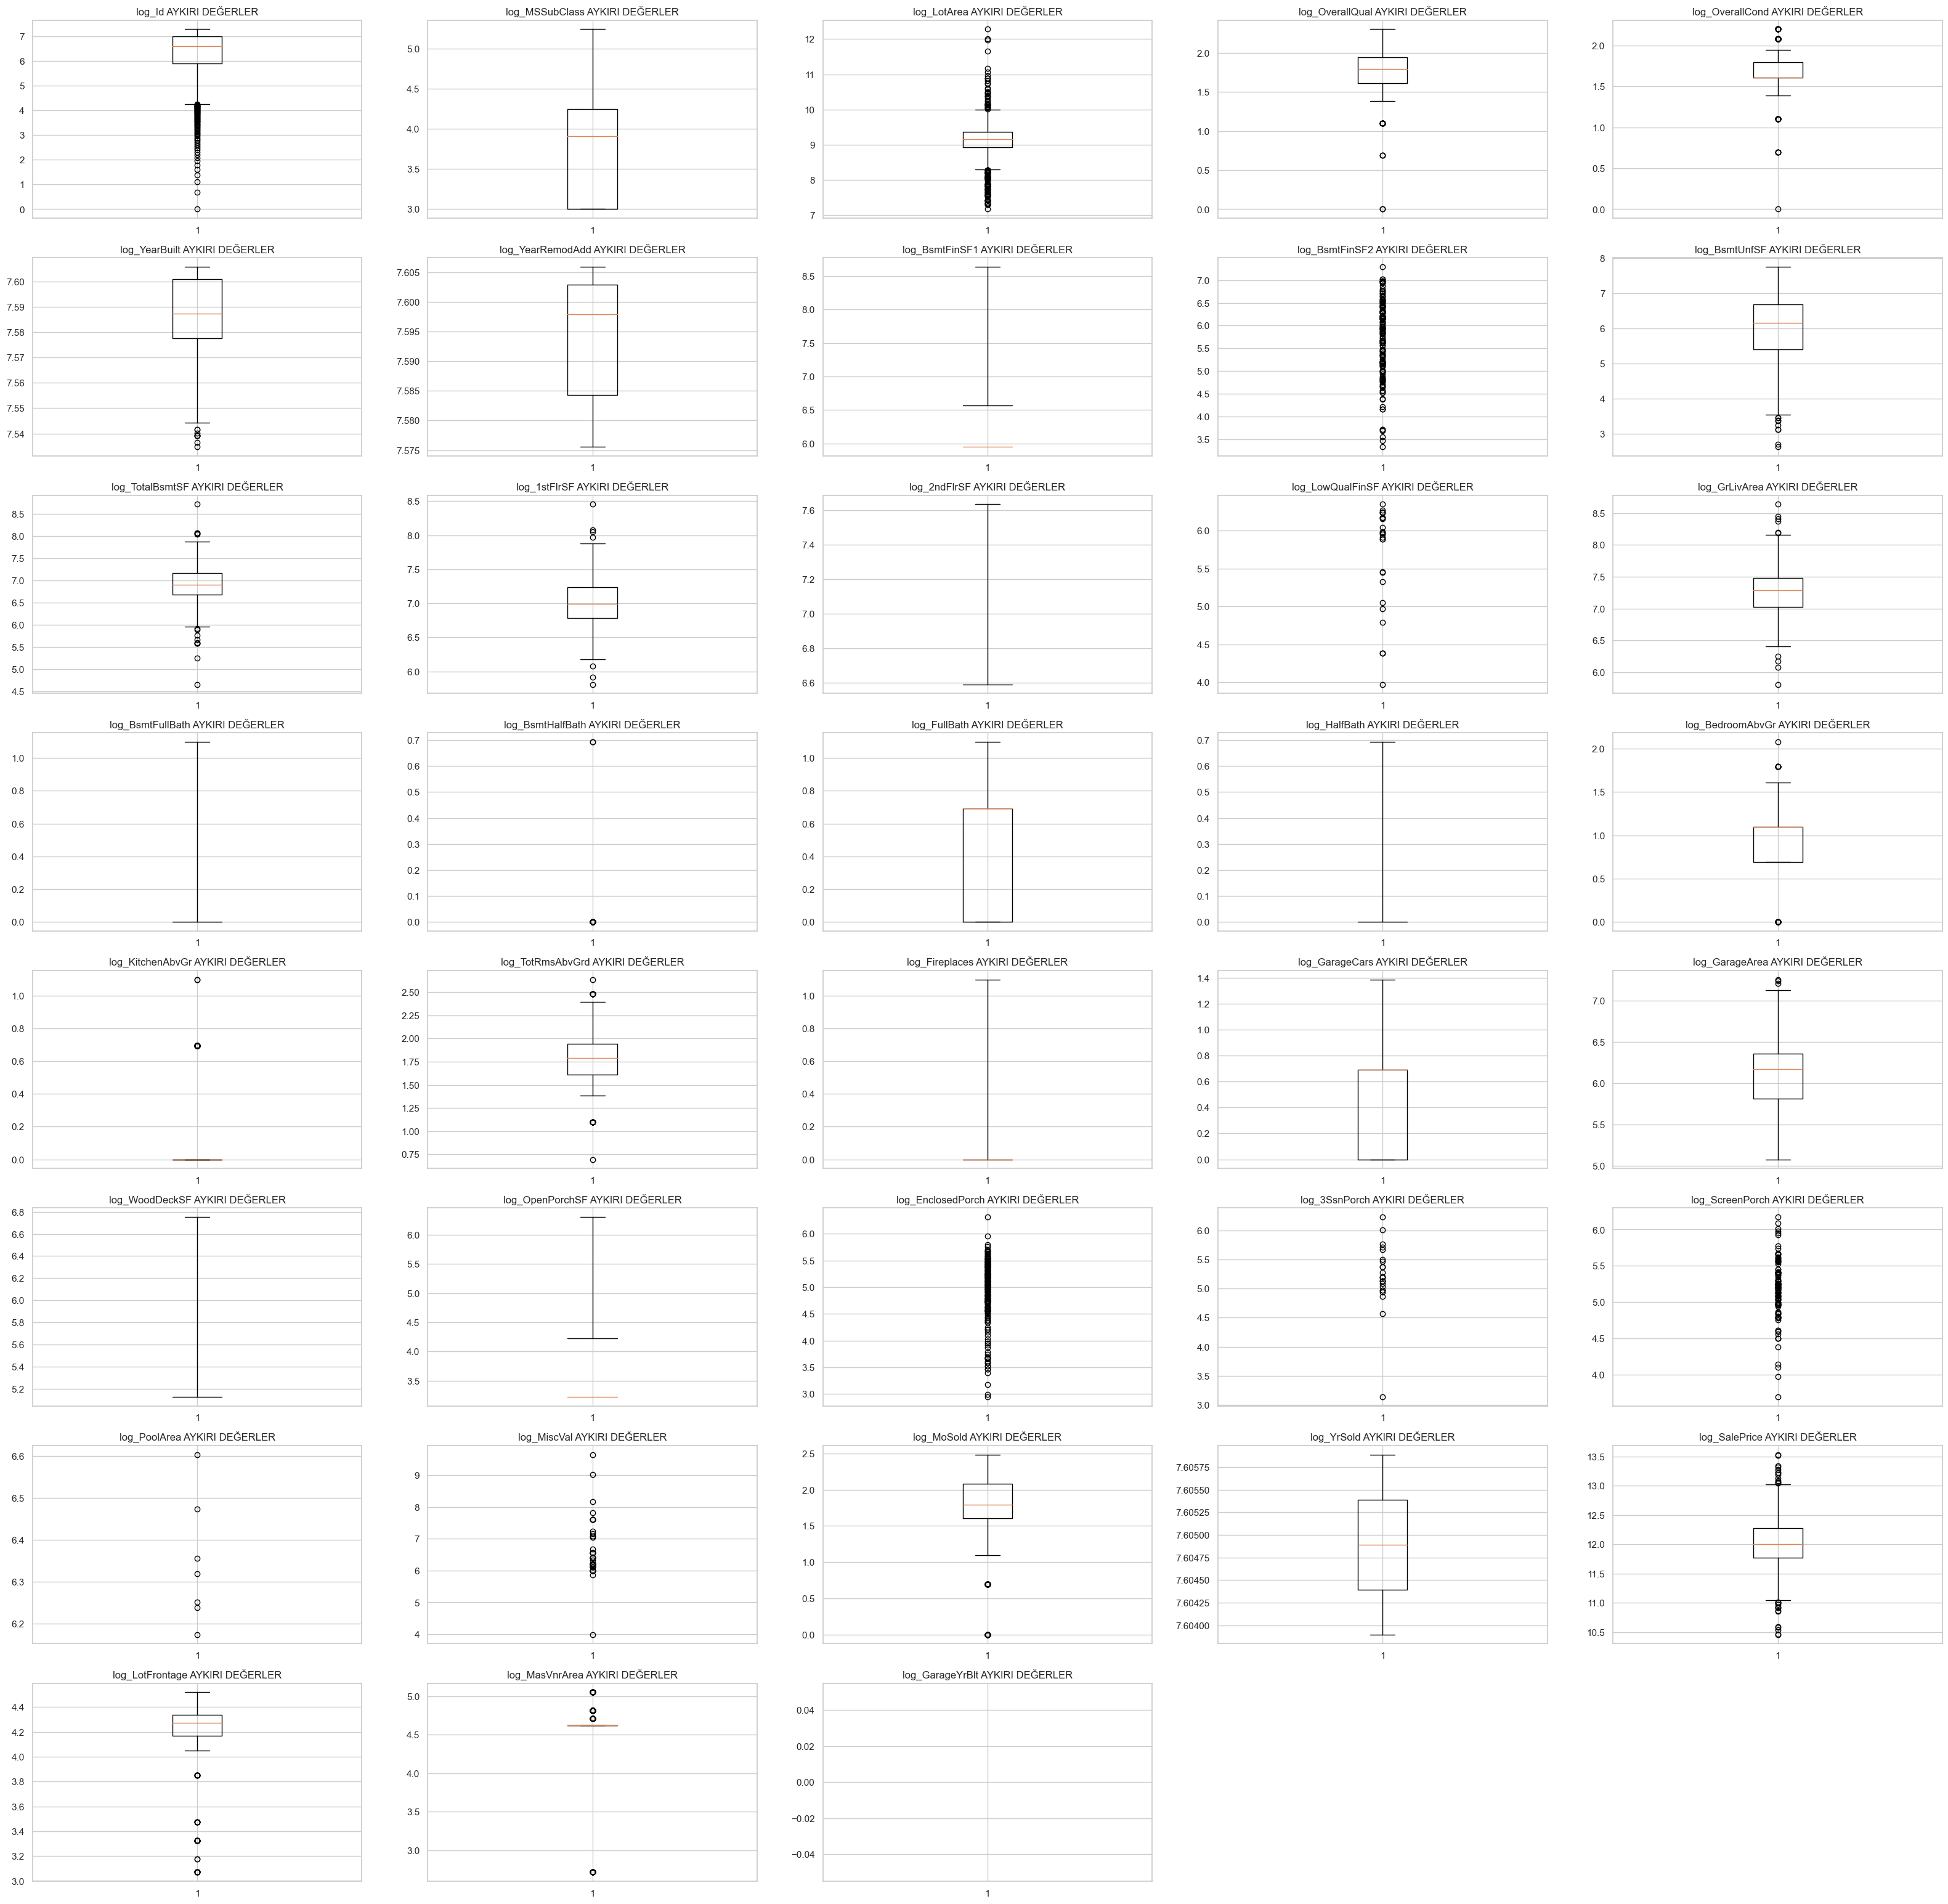

In [40]:
plt.figure(figsize=(40,40))
for i in range(38):
    plt.subplot(8,5,i+1)
    plt.boxplot(copy_numaric[logartima_list[i]])
    plt.title ("{} AYKIRI DEĞERLER".format(logartima_list[i]))

Aykırı değerleri box plot gösteriminde en uygun olan yöntem winsorizedir.

# Dağılımın Gösterimi

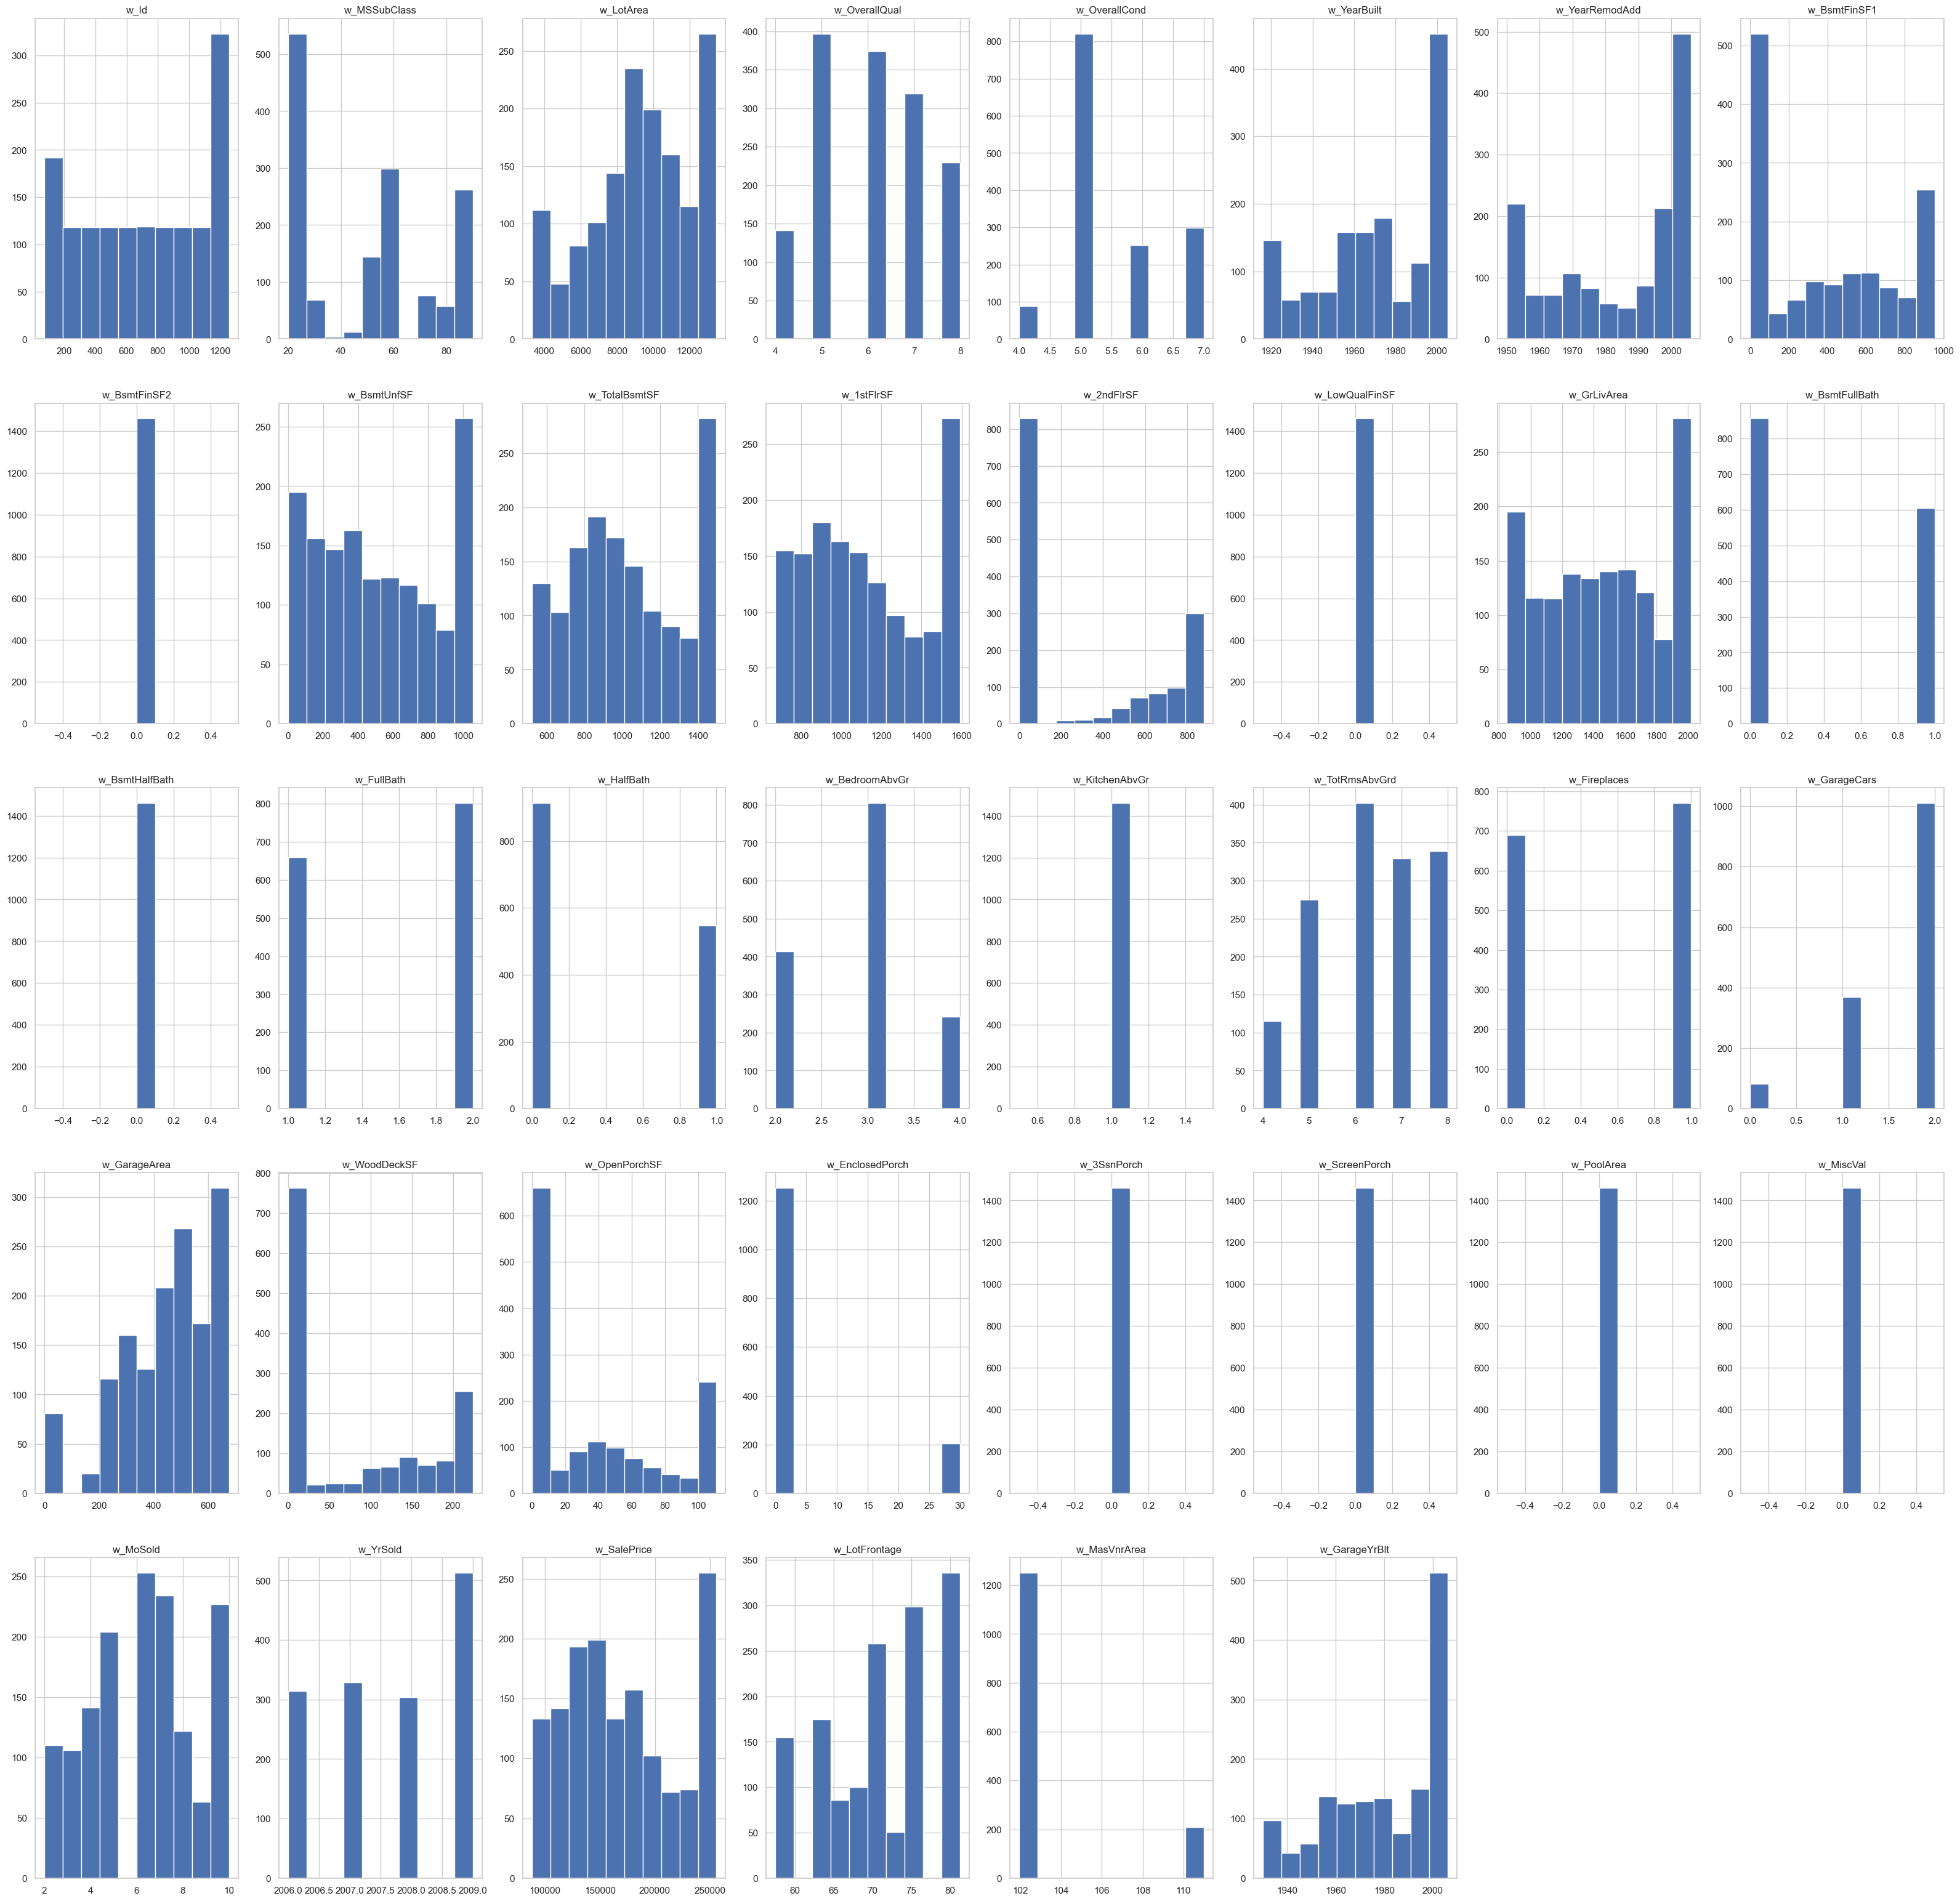

In [41]:
plt.figure(figsize=(40,40))
for i in range (38):
    plt.subplot(5,8,i+1)
    plt.hist(copy_numaric[winsorize_list[i]])
    plt.title(winsorize_list[i])

# Numeric Değerlerde Hedef Değer Analizi

Aykırı Değerlerden arnımış olan Winsorize değişkenlerin korelasyonlarına bakalım

In [42]:
copy_numaric_winsorize_df = copy_numaric.iloc[:,38:76]
copy_numaric_winsorize_df

,w_Id,w_MSSubClass,w_LotArea,w_OverallQual,w_OverallCond,w_YearBuilt,w_YearRemodAdd,w_BsmtFinSF1,w_BsmtFinSF2,w_BsmtUnfSF,...,w_3SsnPorch,w_ScreenPorch,w_PoolArea,w_MiscVal,w_MoSold,w_YrSold,w_SalePrice,w_LotFrontage,w_MasVnrArea,w_GarageYrBlt
0,74,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,2,2008,208500,71.683,101.948,2003.000
1,74,20,9600,6,7,1976,1976,956,0,284,...,0,0,0,0,5,2007,181500,59.714,101.948,1976.000
2,74,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,9,2008,223500,71.683,101.948,2001.000
3,74,70,9550,7,5,1916,1970,216,0,540,...,0,0,0,0,2,2006,140000,71.805,101.948,1998.000
4,74,60,13474,8,5,2000,2000,655,0,490,...,0,0,0,0,10,2008,250000,81.289,101.948,2000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1256,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,0,8,2007,175000,79.878,101.948,1999.000
1456,1256,20,13175,6,6,1978,1988,790,0,589,...,0,0,0,0,2,2009,210000,81.289,101.948,1978.000
1457,1256,70,9042,7,7,1941,2006,275,0,877,...,0,0,0,0,5,2009,256000,71.805,101.948,1941.000
1458,1256,20,9717,5,6,1950,1996,49,0,0,...,0,0,0,0,4,2009,142125,76.462,101.948,1950.000


In [43]:
copy_numaric_winsorize_df.corr()

,w_Id,w_MSSubClass,w_LotArea,w_OverallQual,w_OverallCond,w_YearBuilt,w_YearRemodAdd,w_BsmtFinSF1,w_BsmtFinSF2,w_BsmtUnfSF,...,w_3SsnPorch,w_ScreenPorch,w_PoolArea,w_MiscVal,w_MoSold,w_YrSold,w_SalePrice,w_LotFrontage,w_MasVnrArea,w_GarageYrBlt
w_Id,1.000,0.021,-0.012,-0.028,0.001,-0.009,-0.026,-0.006,nan,-0.009,...,nan,nan,nan,nan,0.024,0.003,-0.021,0.011,0.028,-0.006
w_MSSubClass,0.021,1.000,-0.316,0.102,-0.078,0.042,0.050,-0.087,nan,-0.113,...,nan,nan,nan,nan,0.025,-0.025,0.000,-0.202,0.622,0.094
w_LotArea,-0.012,-0.316,1.000,0.207,-0.030,0.092,0.063,0.168,nan,0.072,...,nan,nan,nan,nan,0.007,-0.025,0.439,0.492,-0.508,-0.015
w_OverallQual,-0.028,0.102,0.207,1.000,-0.171,0.599,0.554,0.132,nan,0.266,...,nan,nan,nan,nan,0.068,-0.026,0.810,0.225,0.021,0.453
w_OverallCond,0.001,-0.078,-0.030,-0.171,1.000,-0.415,0.012,-0.017,nan,-0.128,...,nan,nan,nan,nan,-0.009,0.046,-0.125,-0.104,-0.191,-0.335
w_YearBuilt,-0.009,0.042,0.092,0.599,-0.415,1.000,0.612,0.228,nan,0.084,...,nan,nan,nan,nan,0.009,-0.016,0.613,0.376,0.215,0.711
w_YearRemodAdd,-0.026,0.050,0.063,0.554,0.012,0.612,1.000,0.090,nan,0.135,...,nan,nan,nan,nan,0.020,0.035,0.574,0.161,0.069,0.576
w_BsmtFinSF1,-0.006,-0.087,0.168,0.132,-0.017,0.228,0.090,1.000,nan,-0.586,...,nan,nan,nan,nan,-0.013,0.015,0.293,0.247,-0.001,0.077
w_BsmtFinSF2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
w_BsmtUnfSF,-0.009,-0.113,0.072,0.266,-0.128,0.084,0.135,-0.586,nan,1.000,...,nan,nan,nan,nan,0.035,-0.043,0.185,-0.024,-0.086,0.120


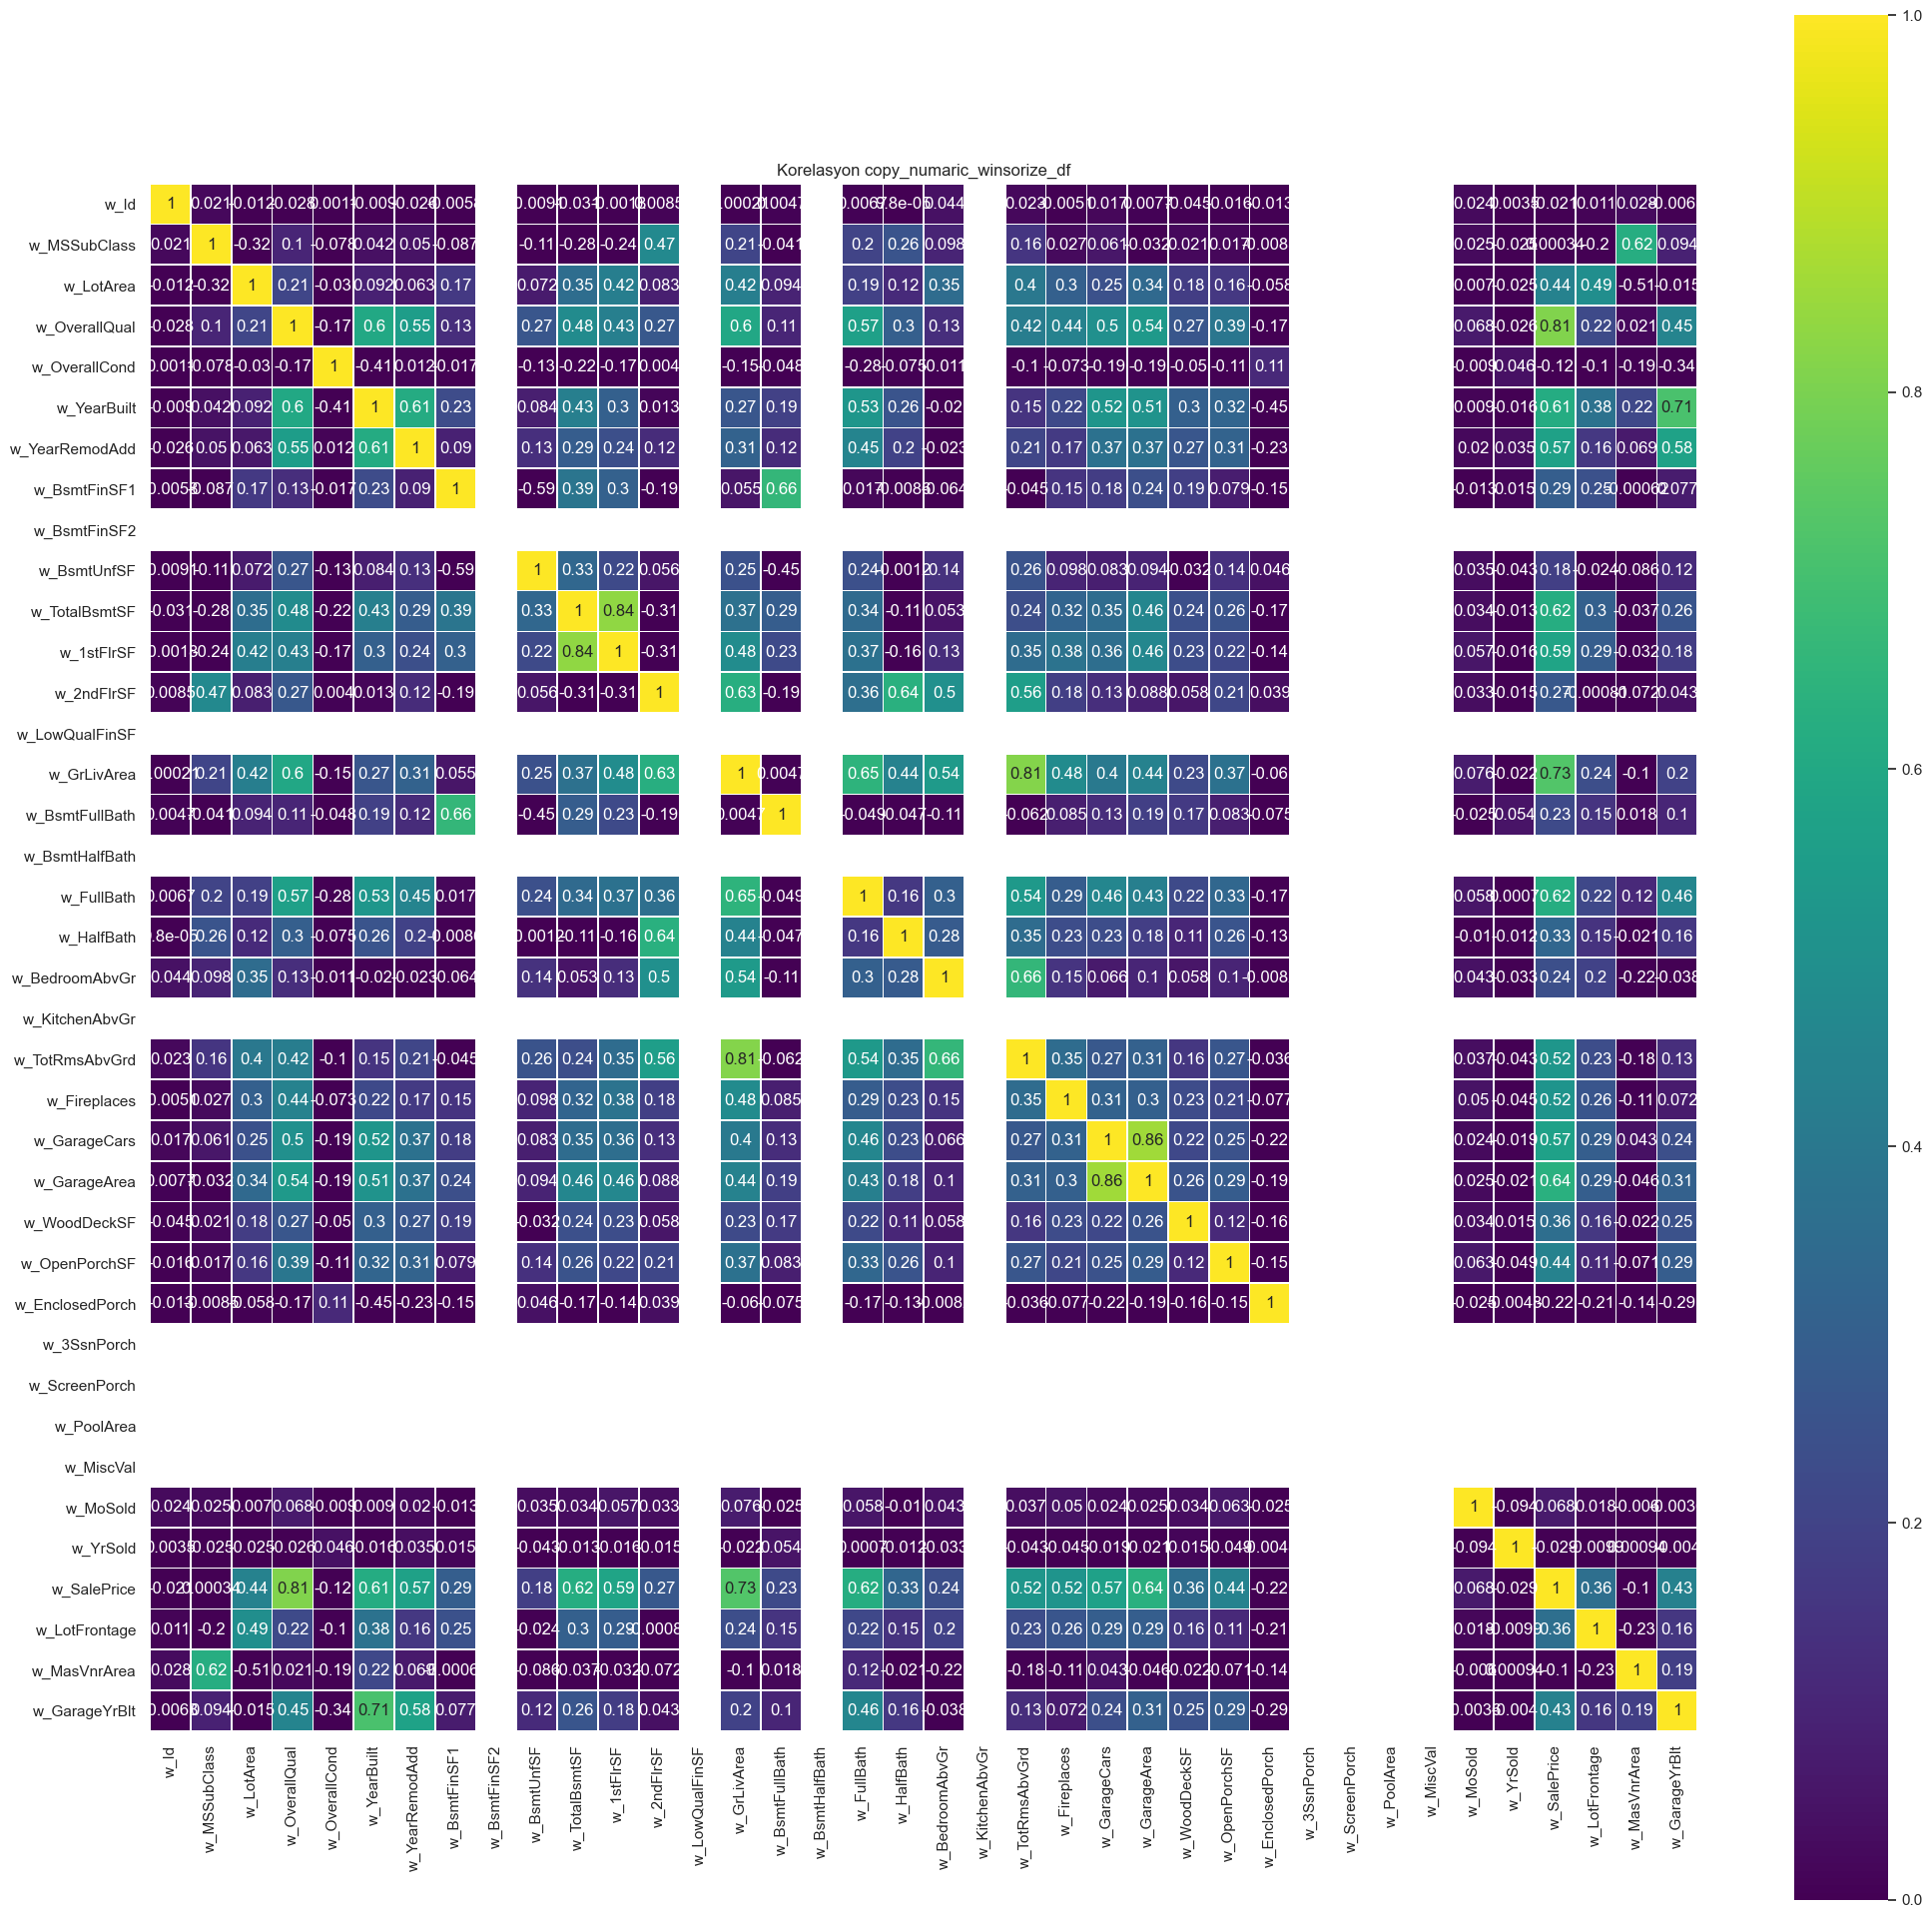

In [44]:
plt.figure(figsize=(25,25))
sns.heatmap(copy_numaric_winsorize_df.corr(), square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon copy_numaric_winsorize_df")
plt.show()

Sale_Price ile en yüksek korelasyona sahip değişkenlerimiz : w_TotalBsmtSF, w_1stFlrSF, w_GrLivArea, w_FullBath, w_TotRmsAbvGrd, w_Fireplaces, w_GarageCars, w_GarageArea

## Katagorik Değişkenlerin İncelenmesi

In [45]:
copy_house_object_df = copy_house1.select_dtypes(include = ["object"]).copy()
copy_house_object_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [46]:
liste_cat =list(copy_house_object_df.columns)
copy_house_object_df["w_SalePrice"] = copy_numaric_winsorize_df["w_SalePrice"]
copy_house_object_df.groupby("Neighborhood")["w_SalePrice"].mean()

Neighborhood
Blmngtn   194367.294
Blueste   137500.000
BrDale    104968.750
BrkSide   128132.328
ClearCr   206601.143
CollgCr   193555.553
Crawfor   198358.059
Edwards   129121.000
Gilbert   190231.405
IDOTRR    108688.541
MeadowV   101723.529
Mitchel   156035.429
NAmes     145400.413
NPkVill   142694.444
NWAmes    187861.027
NoRidge   253000.000
NridgHt   242810.753
OldTown   126824.602
SWISU     143711.360
Sawyer    137247.419
SawyerW   182915.458
Somerst   214450.116
StoneBr   237040.000
Timber    220759.211
Veenker   216136.364
Name: w_SalePrice, dtype: float64

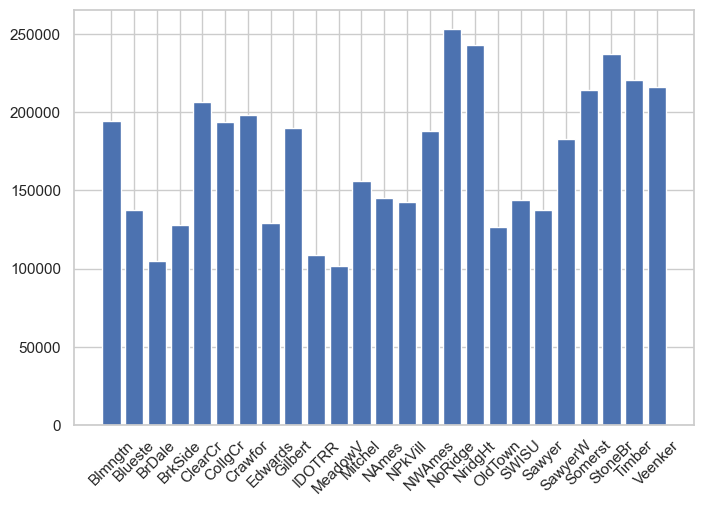

In [47]:
plt.bar(copy_house_object_df.groupby("Neighborhood")["w_SalePrice"].mean().index,copy_house_object_df.groupby("Neighborhood")["w_SalePrice"].mean().values)
plt.xticks(rotation= 45)
plt.show()

In [48]:
copy_house1[["w_TotalBsmtSF", "w_1stFlrSF", "w_GrLivArea", "w_FullBath", "w_TotRmsAbvGrd", "w_Fireplaces", "w_GarageCars", "w_GarageArea"]] = copy_numaric_winsorize_df[["w_TotalBsmtSF", "w_1stFlrSF", "w_GrLivArea", "w_FullBath", "w_TotRmsAbvGrd", "w_Fireplaces", "w_GarageCars", "w_GarageArea"]]
    

liste_cat =list(copy_house_object_df.columns)
for v in liste_cat:
    plt.bar(copy_house_object_df.groupby(v)["w_SalePrice"].mean().index,copy_house_object_df.groupby(v)["w_SalePrice"].mean().values)
    plt.xticks(rotation= 45)
    plt.title("{}".format(v))
    plt.show()
    
        
        
        
        

Özellikleri fazla olan değişkenleri ilk etapta seçeceğiz. Bunlar; 
SaleCondition, SaleType, GarageQual, GarageType, Functional, Neighborhood, Condition2, HouseStyle, RoofMati, Exterion2nd, Fundation, Electrical, Heating, BsmtFinrdType2

# LINEER REGRETİON

Katagorik olarak seçdiğimiz değişkenleri integer formatına göre düzenleyelim 

0-50000 = 0

50000 - 100000 = 1

100000 - 150000 = 2

200000 - 250000 = 3

In [49]:
copy_house1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [50]:
copy_house_object_df["SaleCondition_scale"] = np.nan
        

In [51]:

new_list = ["SaleCondition", "SaleType", "GarageQual", "GarageType", "Functional", "Neighborhood", "Condition2", "HouseStyle", "RoofMatl", "Exterior2nd", "Foundation", "Electrical", "Heating", "BsmtFinType2"]
for i in range(len(new_list)) :
    copy_house1[new_list[i]+"_scale"] = 0
    copy_house1[new_list[i]+"_bysellprice"] = 0

copy_house1["w_SalePrice"] = copy_numaric_winsorize_df["w_SalePrice"]

In [52]:
new_list2_by = []
for i in range(len(new_list)):
    new_list2_by.append(new_list[i] + "_bysellprice")
   

new_list3_scale = []
for i in range(len(new_list)):
     new_list3_scale.append(new_list[i] + "_scale")

In [53]:
new_list4 =new_list+new_list2_by+new_list3_scale

In [54]:
new_list2_by


['SaleCondition_bysellprice',
 'SaleType_bysellprice',
 'GarageQual_bysellprice',
 'GarageType_bysellprice',
 'Functional_bysellprice',
 'Neighborhood_bysellprice',
 'Condition2_bysellprice',
 'HouseStyle_bysellprice',
 'RoofMatl_bysellprice',
 'Exterior2nd_bysellprice',
 'Foundation_bysellprice',
 'Electrical_bysellprice',
 'Heating_bysellprice',
 'BsmtFinType2_bysellprice']

In [55]:
new_df = pd.DataFrame(copy_house1["SaleCondition"])
for i in new_list4:
    new_df[i]=copy_house1[i]
    
new_df["w_SalePrice"] = copy_house1["w_SalePrice"]

In [56]:
new_df

,SaleCondition,SaleType,GarageQual,GarageType,Functional,Neighborhood,Condition2,HouseStyle,RoofMatl,Exterior2nd,...,Neighborhood_scale,Condition2_scale,HouseStyle_scale,RoofMatl_scale,Exterior2nd_scale,Foundation_scale,Electrical_scale,Heating_scale,BsmtFinType2_scale,w_SalePrice
0,Normal,WD,TA,Attchd,Typ,CollgCr,Norm,2Story,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,208500
1,Normal,WD,TA,Attchd,Typ,Veenker,Norm,1Story,CompShg,MetalSd,...,0,0,0,0,0,0,0,0,0,181500
2,Normal,WD,TA,Attchd,Typ,CollgCr,Norm,2Story,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,223500
3,Abnorml,WD,TA,Detchd,Typ,Crawfor,Norm,2Story,CompShg,Wd Shng,...,0,0,0,0,0,0,0,0,0,140000
4,Normal,WD,TA,Attchd,Typ,NoRidge,Norm,2Story,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Normal,WD,TA,Attchd,Typ,Gilbert,Norm,2Story,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,175000
1456,Normal,WD,TA,Attchd,Min1,NWAmes,Norm,1Story,CompShg,Plywood,...,0,0,0,0,0,0,0,0,0,210000
1457,Normal,WD,TA,Attchd,Typ,Crawfor,Norm,2Story,CompShg,CmentBd,...,0,0,0,0,0,0,0,0,0,256000
1458,Normal,WD,TA,Attchd,Typ,NAmes,Norm,1Story,CompShg,MetalSd,...,0,0,0,0,0,0,0,0,0,142125


In [113]:
new_df.columns

Index(['SaleCondition', 'SaleType', 'GarageQual', 'GarageType', 'Functional',
       'Neighborhood', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior2nd',
       'Foundation', 'Electrical', 'Heating', 'BsmtFinType2',
       'SaleCondition_bysellprice', 'SaleType_bysellprice',
       'GarageQual_bysellprice', 'GarageType_bysellprice',
       'Functional_bysellprice', 'Neighborhood_bysellprice',
       'Condition2_bysellprice', 'HouseStyle_bysellprice',
       'RoofMatl_bysellprice', 'Exterior2nd_bysellprice',
       'Foundation_bysellprice', 'Electrical_bysellprice',
       'Heating_bysellprice', 'BsmtFinType2_bysellprice',
       'SaleCondition_scale', 'SaleType_scale', 'GarageQual_scale',
       'GarageType_scale', 'Functional_scale', 'Neighborhood_scale',
       'Condition2_scale', 'HouseStyle_scale', 'RoofMatl_scale',
       'Exterior2nd_scale', 'Foundation_scale', 'Electrical_scale',
       'Heating_scale', 'BsmtFinType2_scale', 'w_SalePrice'],
      dtype='object')

In [126]:
grup = new_df.groupby("SaleCondition")["w_SalePrice"].mean()
 

In [127]:
grup

SaleCondition
Abnorml   142461.168
AdjLand   107375.000
Alloca    159872.167
Family    149725.000
Normal    168720.413
Partial   223148.880
Name: w_SalePrice, dtype: float64

In [156]:
grup_index = list(new_df.groupby("SaleCondition")["w_SalePrice"].mean().index)

columns_list = ['SaleCondition', 'SaleType', 'GarageQual', 'GarageType', 'Functional',
       'Neighborhood', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior2nd',
       'Foundation', 'Electrical', 'Heating', 'BsmtFinType2']

In [129]:
grup_index

['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']

In [130]:
new_df.drop(['SaleCondition_scale', 'SaleType_scale', 'GarageQual_scale',
       'GarageType_scale', 'Functional_scale', 'Neighborhood_scale',
       'Condition2_scale', 'HouseStyle_scale', 'RoofMatl_scale',
       'Exterior2nd_scale', 'Foundation_scale', 'Electrical_scale',
       'Heating_scale', 'BsmtFinType2_scale'], axis = 1)
    

,SaleCondition,SaleType,GarageQual,GarageType,Functional,Neighborhood,Condition2,HouseStyle,RoofMatl,Exterior2nd,...,Neighborhood_bysellprice,Condition2_bysellprice,HouseStyle_bysellprice,RoofMatl_bysellprice,Exterior2nd_bysellprice,Foundation_bysellprice,Electrical_bysellprice,Heating_bysellprice,BsmtFinType2_bysellprice,w_SalePrice
0,Normal,WD,TA,Attchd,Typ,CollgCr,Norm,2Story,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,208500
1,Normal,WD,TA,Attchd,Typ,Veenker,Norm,1Story,CompShg,MetalSd,...,0,0,0,0,0,0,0,0,0,181500
2,Normal,WD,TA,Attchd,Typ,CollgCr,Norm,2Story,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,223500
3,Abnorml,WD,TA,Detchd,Typ,Crawfor,Norm,2Story,CompShg,Wd Shng,...,0,0,0,0,0,0,0,0,0,140000
4,Normal,WD,TA,Attchd,Typ,NoRidge,Norm,2Story,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Normal,WD,TA,Attchd,Typ,Gilbert,Norm,2Story,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,175000
1456,Normal,WD,TA,Attchd,Min1,NWAmes,Norm,1Story,CompShg,Plywood,...,0,0,0,0,0,0,0,0,0,210000
1457,Normal,WD,TA,Attchd,Typ,Crawfor,Norm,2Story,CompShg,CmentBd,...,0,0,0,0,0,0,0,0,0,256000
1458,Normal,WD,TA,Attchd,Typ,NAmes,Norm,1Story,CompShg,MetalSd,...,0,0,0,0,0,0,0,0,0,142125


In [134]:
for i in range(len(new_df)):
    for z in grup_index:
        if new_df["SaleCondition"][i] == z:
            new_df["SaleCondition_bysellprice"][i] = a[z]

In [146]:
new_df.columns

Index(['SaleCondition', 'SaleType', 'GarageQual', 'GarageType', 'Functional',
       'Neighborhood', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior2nd',
       'Foundation', 'Electrical', 'Heating', 'BsmtFinType2',
       'SaleCondition_bysellprice', 'SaleType_bysellprice',
       'GarageQual_bysellprice', 'GarageType_bysellprice',
       'Functional_bysellprice', 'Neighborhood_bysellprice',
       'Condition2_bysellprice', 'HouseStyle_bysellprice',
       'RoofMatl_bysellprice', 'Exterior2nd_bysellprice',
       'Foundation_bysellprice', 'Electrical_bysellprice',
       'Heating_bysellprice', 'BsmtFinType2_bysellprice',
       'SaleCondition_scale', 'SaleType_scale', 'GarageQual_scale',
       'GarageType_scale', 'Functional_scale', 'Neighborhood_scale',
       'Condition2_scale', 'HouseStyle_scale', 'RoofMatl_scale',
       'Exterior2nd_scale', 'Foundation_scale', 'Electrical_scale',
       'Heating_scale', 'BsmtFinType2_scale', 'w_SalePrice'],
      dtype='object')

In [178]:
for n in columns_list:
    a = new_df.groupby(n)["w_SalePrice"].mean()
    grup_index = list(new_df.groupby(n)["w_SalePrice"].mean().index)
    for i in range(len(new_df)):
        for z in grup_index:
            if new_df[n][i] == z:
                new_df[n + "_bysellprice"][i] = a[z]

In [185]:
xlist = ['SaleCondition_bysellprice', 'SaleType_bysellprice',
       'GarageQual_bysellprice', 'GarageType_bysellprice',
       'Functional_bysellprice', 'Neighborhood_bysellprice',
       'Condition2_bysellprice', 'HouseStyle_bysellprice',
       'RoofMatl_bysellprice', 'Exterior2nd_bysellprice',
       'Foundation_bysellprice', 'Electrical_bysellprice',
       'Heating_bysellprice', 'BsmtFinType2_bysellprice']
for x in xlist :
    copy_house1[x] = new_df[x]

171062.26575342467

In [154]:
new_df.BsmtFinType2_scale.unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtFinType2_scale, Length: 1460, dtype: int64>

Katagorik değişkenlerde yapamadığımız için numeric değişkenlerden regresyon yapacağız.

In [188]:
from sklearn import linear_model

Y = copy_house1["w_SalePrice"]
X = copy_house1[["w_TotalBsmtSF", "w_1stFlrSF", "w_GrLivArea", "w_FullBath", "w_TotRmsAbvGrd", "w_Fireplaces", "w_GarageCars", "w_GarageArea",'SaleCondition_bysellprice', 'SaleType_bysellprice',
       'GarageQual_bysellprice', 'GarageType_bysellprice',
       'Functional_bysellprice', 'Neighborhood_bysellprice',
       'Condition2_bysellprice', 'HouseStyle_bysellprice',
       'RoofMatl_bysellprice', 'Exterior2nd_bysellprice',
       'Foundation_bysellprice', 'Electrical_bysellprice',
       'Heating_bysellprice', 'BsmtFinType2_bysellprice']]

In [189]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [193]:
tahmin = lrm.predict(copy_house1[["w_TotalBsmtSF", "w_1stFlrSF", "w_GrLivArea", "w_FullBath", "w_TotRmsAbvGrd", "w_Fireplaces", "w_GarageCars", "w_GarageArea",'SaleCondition_bysellprice', 'SaleType_bysellprice',
       'GarageQual_bysellprice', 'GarageType_bysellprice',
       'Functional_bysellprice', 'Neighborhood_bysellprice',
       'Condition2_bysellprice', 'HouseStyle_bysellprice',
       'RoofMatl_bysellprice', 'Exterior2nd_bysellprice',
       'Foundation_bysellprice', 'Electrical_bysellprice',
       'Heating_bysellprice', 'BsmtFinType2_bysellprice']])

## Lineer Regretions Varsayımları

Tahmin ile değişken arasındaki arasındaki ilişki incelemesi

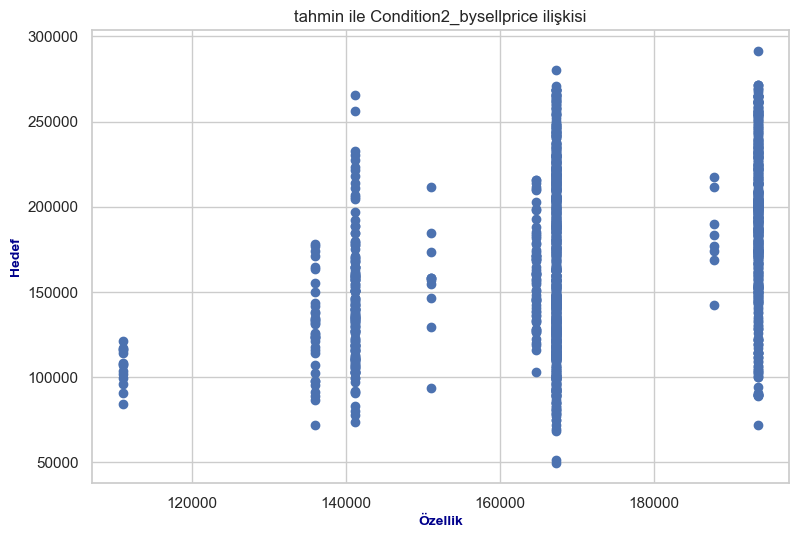

In [199]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

plt.figure(figsize=(9,6))
plt.scatter(copy_house1["HouseStyle_bysellprice"], tahmin)
plt.xlabel("Özellik", fontdict=eksen_font)
plt.ylabel("Hedef", fontdict=eksen_font)
plt.title("tahmin ile Condition2_bysellprice ilişkisi")
plt.show()

### Hata Terimi ortalamada 0 Olmalıdır.

In [201]:
hatalar = Y -tahmin
print("HouseSalePrice ortalama hatası : {:.15f}".format(np.mean(hatalar)))

HouseSalePrice ortalama hatası : -0.000000000001595


0 a çok yakın bir değer bulduk.

### Varsayım 3: homoscedasticity

In [203]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 1001.92 ve p değeri : 0.000000000000000000000
Levene test değeri   : 1177.54 ve p değeri : 0.000000000000000000000


p değeri 0.05 den küçük olduğu için Heteroscedasticity durumu söz konusudur.

### Varsayım 4: düşük çoklu doğrusallık/low multicollinearity

### Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır

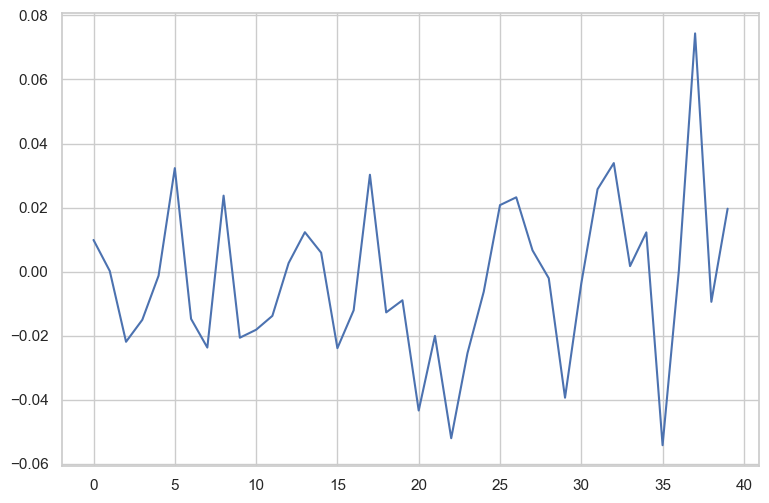

In [204]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

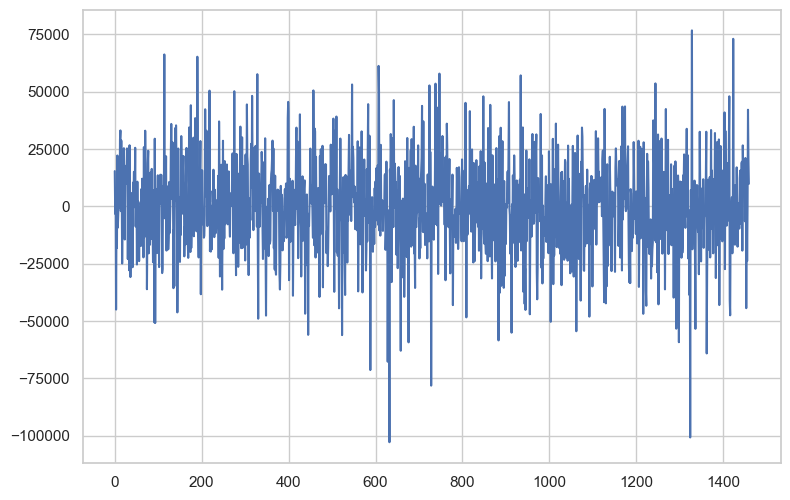

In [205]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

### Varsayım 6: özellikler hatalarla korele olmamalıdır ve Hataların Normal Dağılımı

In [ ]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

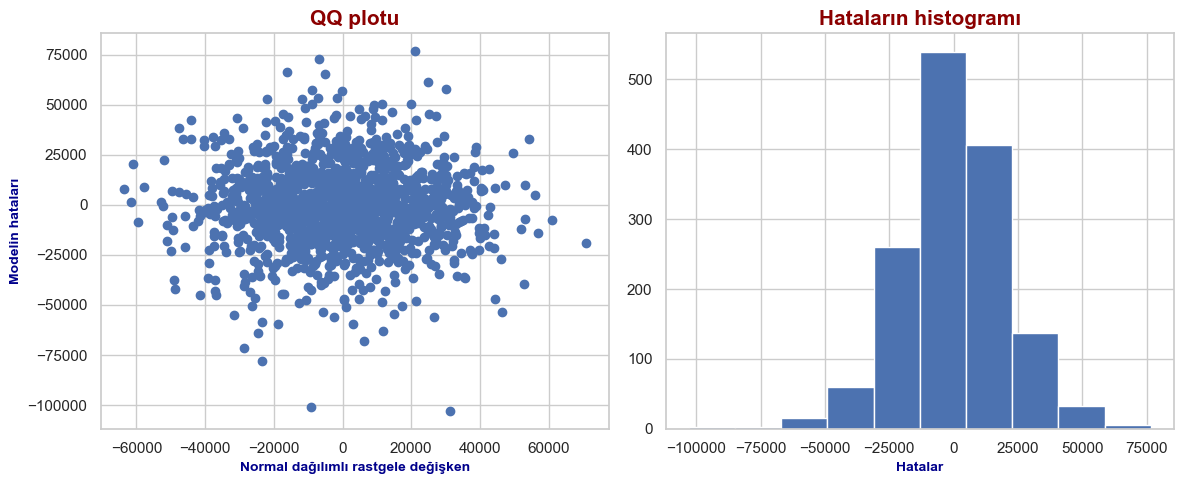

In [207]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [209]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 140.35412391761287 ve p değeri : 0.0
Normal test değeri      : 58.47902201751833  ve p değeri : 0.000000000000200189693823220861


In [206]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 3.13682050e+01 -1.72682266e+00  5.82115228e+01 -1.20177239e+03
 -2.30142908e+03  9.17084763e+03 -1.07420606e+03  4.29696184e+01
  1.11296816e-01  4.89165364e-03  9.87065590e-02  1.26430004e-01
  5.16315048e-01  3.51036225e-01  2.00632481e-01 -3.84514567e-03
  4.20219345e-01  1.09772662e-01  1.22301556e-01  9.74680180e-02
  1.28208857e-02  2.62504712e-01]
Sabit değer (bias): 
 -366120.36190148594


lrm_ornek = linear_model.LinearRegression()
lrm_ornek.fit(df[["X","X_sq"]],df["Y"])

tahmin = lrm_ornek.predict(df[["X","X_sq"]])

print('Değişkenler: \n', lrm_ornek.coef_)
print('Sabit değer (bias): \n', lrm_ornek.intercept_)

plt.figure(figsize=(9,6))
plt.scatter(df["X"], tahmin)
plt.xlabel("Özellik", fontdict=eksen_font)
plt.ylabel("Hedef", fontdict=eksen_font)
plt.title('Doğrusal regresyon, ikinci dereceden ilişkiyi hesaplayabilir', fontdict=baslik_font)
plt.show()

In [191]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            w_SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     377.4
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:03:06   Log-Likelihood:                -16544.
No. Observations:                1460   AIC:                         3.313e+04
Df Residuals:                    1437   BIC:                         3.326e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.661e+05   3.52e+04    -10.416      0.000   -4.35e+05   -2.97e+05
w_TotalBsmtSF                31.3682      3.537      8.869      0.000      24.430      38.306
w_1stFlrSF                   -1.7268      3.857     -0.448      0.654      -9.292       5.838
w_GrLivArea                  58.2115      3.063     19.007      0.000      52.204      64.219
w_FullBath                -1201.7724   1609.037     -0.747      0.455   -4358.086    1954.541
w_TotRmsAbvGrd            -2301.4291    761.991     -3.020      0.003   -3796.163    -806.695
w_Fireplaces               9170.8476   1301.426      7.047      0.000    6617.950    1.17e+04
w_GarageCars              -1074.2061   1866.932     -0.575      0.565   -4736.411    2587.999
w_GarageArea                 42.9696      6.547      6.563      0.000      30.127      55.812
SaleCondition_bysellprice     0.1113      0.062      1.787      0.074      -0.011       0.233
SaleType_bysellprice          0.0049      0.064      0.076      0.940      -0.122       0.131
GarageQual_bysellprice        0.0987      0.057      1.726      0.085      -0.013       0.211
GarageType_bysellprice        0.1264      0.026      4.930      0.000       0.076       0.177
Functional_bysellprice        0.5163      0.072      7.165      0.000       0.375       0.658
Neighborhood_bysellprice      0.3510      0.021     17.000      0.000       0.311       0.392
Condition2_bysellprice        0.2006      0.098      2.050      0.041       0.009       0.393
HouseStyle_bysellprice       -0.0038      0.037     -0.104      0.917      -0.077       0.069
RoofMatl_bysellprice          0.4202      0.086      4.896      0.000       0.252       0.589
Exterior2nd_bysellprice       0.1098      0.029      3.734      0.000       0.052       0.167
Foundation_bysellprice        0.1223      0.026      4.678      0.000       0.071       0.174
Electrical_bysellprice        0.0975      0.037      2.666      0.008       0.026       0.169
Heating_bysellprice           0.0128      0.075      0.171      0.864      -0.134       0.160
BsmtFinType2_bysellprice      0.2625      0.114      2.301      0.022       0.039       0.486
==============================================================================
Omnibus:                       58.479   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.354
Skew:                          -0.194   Prob(JB):                     3.33e-31
Kurtosis:                       4.468   Cond. No.                     4.23e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+07. This might indicate 